# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Skillfactory---Практический-Machine-Learning" data-toc-modified-id="Skillfactory---Практический-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skillfactory - Практический Machine Learning</a></div><div class="lev2 toc-item"><a href="#19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)" data-toc-modified-id="19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)</a></div><div class="lev1 toc-item"><a href="#Создание-пайплайна-и-генерация-признаков" data-toc-modified-id="Создание-пайплайна-и-генерация-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создание пайплайна и генерация признаков</a></div><div class="lev2 toc-item"><a href="#Посмотрим-на-данные" data-toc-modified-id="Посмотрим-на-данные-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим на данные</a></div><div class="lev2 toc-item"><a href="#Генерим-признаки" data-toc-modified-id="Генерим-признаки-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Генерим признаки</a></div><div class="lev2 toc-item"><a href="#Подбор-гипер-параметров" data-toc-modified-id="Подбор-гипер-параметров-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подбор гипер-параметров</a></div><div class="lev3 toc-item"><a href="#Pipeline" data-toc-modified-id="Pipeline-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Pipeline</a></div><div class="lev3 toc-item"><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Подбор гиперпараметров</a></div><div class="lev4 toc-item"><a href="#Grid-search" data-toc-modified-id="Grid-search-2321"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Grid search</a></div><div class="lev4 toc-item"><a href="#Random-Search" data-toc-modified-id="Random-Search-2322"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>Random Search</a></div><div class="lev3 toc-item"><a href="#HyperOpt" data-toc-modified-id="HyperOpt-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>HyperOpt</a></div><div class="lev2 toc-item"><a href="#Ваш-черед" data-toc-modified-id="Ваш-черед-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ваш черед</a></div><div class="lev3 toc-item"><a href="#Новые-признаки" data-toc-modified-id="Новые-признаки-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Новые признаки</a></div><div class="lev2 toc-item"><a href="#Поиск-гиперпараметров" data-toc-modified-id="Поиск-гиперпараметров-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Поиск гиперпараметров</a></div>

# Skillfactory - Практический Machine Learning
## 19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)

<center> Шестаков Андрей </center>

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Создание пайплайна и генерация признаков
<center>Шестаков Андрей</center>

В этом задании мы рассмотрим данные с предыдущего Sberbank Data Science Contest. К сожалению найти страницу с конкурсом уже не получается.

Одной из задач была опредление пола владельца карты по его транзакциям на карте. Зачем это нужно - одному сберу известно, но эта задача была хороша тем, что в ней можно нагенерировать много разных признаков

Есть такая [презентация](https://alexanderdyakonov.files.wordpress.com/2016/10/dj2016_sdsj_vis.pdf) с предварительным анализом данных и идеями про признаки

Нам понадобятся файлы `customers_gender_train.csv`, `transactions.tsv.gz`, `mcc_types.tsv` и `trans_types.tsv`.

## Посмотрим на данные

Это метки ответов

In [96]:
df_gender = pd.read_csv('data/customers_gender_train.csv')
df_gender.head()

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1
4,61009479,0


Это сами транзакции (отрицательные транзакции - списывание, положительные - зачисление на счет)

In [97]:
df_transactions = pd.read_csv('data/transactions.csv.gz')
df_transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


Далее, расшифровки кодов [mcc](https://ru.wikipedia.org/wiki/Merchant_Category_Code) и транзакций

In [98]:
df_tr = pd.read_csv('data/tr_types.csv', sep=';')
df_tr.head()

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [99]:
df_mcc = pd.read_csv('data/tr_mcc_codes.csv', sep=';')
df_mcc.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


Первое что мы видем - это странная дата и суммы в транзакциях. 

В принципе, посмотрев на исходное распределение "относительных" дат по какой-нибудь гендерной группы mcc, становится примерно понятно, что за даты закодированы.

Ну а суммы транзакций организаторы просто умножили на $\pi^{\exp}$ =)

Преобразование будет проделано ниже, но при желании, можете сами со всем разобраться.

In [100]:
from pandas import Timestamp, DateOffset

In [101]:
def preproc_transactions(df_transactions):
    sec_per_day = 86400
    sec_per_hour = 3600
    
    start_date = 1420070400 - 154 * sec_per_day - 3 * sec_per_hour
    
    df_transactions.loc[:, 'day'] = df_transactions.tr_datetime\
                                               .str.split(' ')\
                                               .str.get(0)\
                                               .astype(int)
    df_transactions.loc[:, 'time_raw'] = df_transactions.tr_datetime\
                                                    .str.split(' ')\
                                                    .str.get(1)

    # set temp dt
    df_transactions.loc[:, 'dt_temp'] = pd.to_datetime(df_transactions.loc[:, 'time_raw'], 
                                                    format='%H:%M:%S')\
                                        + DateOffset(years=115)
    
    df_transactions = df_transactions.assign(dt = lambda x: x.dt_temp.astype(np.int64) // 10**9
                                             + (x.day - 153) * sec_per_day)\
                                     .assign(weekday = lambda x: ((x.day + 4) % 7 + 1))
        
    df_transactions.loc[:, 'datetime'] = pd.to_datetime(df_transactions.dt, unit='s')
    df_transactions.loc[:, 'date'] = df_transactions.loc[:, 'datetime'].dt.strftime('%Y-%m-%d')
    df_transactions.loc[:, 'hour'] = df_transactions.loc[:, 'datetime'].dt.strftime('%H')
    
    df_transactions = df_transactions.drop(['dt_temp', 'time_raw', 'tr_datetime'], axis=1)
    
    df_transactions.loc[:, 'amount'] = np.round(df_transactions.loc[:, 'amount']/(np.pi**np.exp(1)))
            
    return df_transactions

In [102]:
df_transactions = df_transactions.pipe(preproc_transactions)

In [103]:
df_transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15


## Генерим признаки

В качестве базовых признаков, можно взять, например, 
* количество (доля) транзакций по каждому mcc_code
* количество (доля) транзакций в разные промежутки времени

In [104]:
df_hour_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)
df_transactions['hour']

df_hour_rations.loc[:, 'morning'] = (df_hour_rations.loc[:, '05':'11'].sum(axis=1).T/total).T
df_hour_rations.loc[:, 'day'] = (df_hour_rations.loc[:, '12':'17'].sum(axis=1).T/total).T
df_hour_rations.loc[:, 'evening'] = (df_hour_rations.loc[:, '18':'23'].sum(axis=1).T/total).T
df_hour_rations.loc[:, 'night'] = (df_hour_rations.loc[:, '00':'04'].sum(axis=1).T/total).T
# df_hour_rations.loc[:, 'total'] = 

In [105]:
total

customer_id
6815        169
22899       180
27914        62
28753       261
31385       268
38084       701
42096       612
49101        30
49793       409
50940        95
52926       479
53395        33
70680       220
78659       238
81626       128
85327        55
85635         2
104032       55
114348      377
115617       48
117556      565
126081      392
126935      453
127946       55
137367      134
168767      394
172390      292
174467      205
177299      288
186730      189
           ... 
99815733     51
99834424    261
99836889     27
99848367    213
99849205     46
99849278    349
99859464     19
99864691     35
99876778    491
99877835    221
99882949    129
99888537     99
99900908     62
99911226    300
99915912    845
99917144    503
99918216    136
99933081    125
99938948    450
99953525    116
99963907    422
99967537     13
99969946    651
99977292    506
99980396    451
99984336     54
99985917     19
99988578    602
99991245    191
99999680    309
Length: 1500

In [106]:
df_hour_rations.loc[:, '05':'11'].sum(axis=1).T/total.T

customer_id
6815        0.579882
22899       0.461111
27914       0.887097
28753       0.616858
31385       0.395522
38084       0.298146
42096       0.560458
49101       1.266667
49793       0.276284
50940       0.221053
52926       0.459290
53395       0.030303
70680       0.136364
78659       0.058824
81626       0.093750
85327       0.836364
85635       0.500000
104032      0.436364
114348      0.458886
115617      0.250000
117556      0.748673
126081      0.431122
126935      0.256071
127946      0.200000
137367      0.694030
168767      0.170051
172390      0.321918
174467      0.507317
177299      0.437500
186730      0.312169
              ...   
99815733    0.352941
99834424    0.245211
99836889    0.037037
99848367    0.309859
99849205    0.282609
99849278    0.656160
99859464    0.368421
99864691    0.885714
99876778    0.232179
99877835    0.583710
99882949    1.054264
99888537    1.060606
99900908    1.016129
99911226    0.183333
99915912    0.660355
99917144    0.069583
9

In [107]:
def gen_features(df_gender, df_transactions):
    
    df_mcc_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                             aggfunc=np.size, fill_value=0)

    df_mcc_counts = df_mcc_counts.rename_axis(lambda x: 'mcc_{}_count'.format(x), axis=1)

    df_hour_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)

    # Сложная и нетривиальная конструкция
    total = df_hour_rations.sum(axis=1)
    df_hour_rations.loc[:, 'morning'] = (df_hour_rations.loc[:, '05':'11'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'day'] = (df_hour_rations.loc[:, '12':'17'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'evening'] = (df_hour_rations.loc[:, '18':'23'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'night'] = (df_hour_rations.loc[:, '00':'04'].sum(axis=1).T/total).T


    # Объединяем:
    df_features = df_gender.join(df_mcc_counts, on='customer_id', how='left')\
                           .join(df_hour_rations.loc[:, ['morning', 'day', 'evening', 'night']], on='customer_id', how='left')
        
    return df_features

In [108]:
df_hour_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)
df_hour_rations

hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0,1,1,0,0,0,1,2,4,20,...,36,18,9,9,7,6,7,2,0,0
22899,2,6,6,3,2,1,1,0,1,20,...,16,18,19,7,13,12,11,4,5,0
27914,2,0,0,1,1,2,2,6,16,5,...,14,2,13,6,3,2,0,0,0,0
28753,67,1,9,7,15,21,22,21,18,10,...,8,3,1,2,0,0,0,1,0,0
31385,11,0,0,0,0,0,0,16,16,13,...,14,16,19,16,23,18,18,40,26,3
38084,137,6,4,4,2,5,8,7,27,59,...,57,45,113,92,44,42,38,13,15,8
42096,126,0,3,2,11,19,32,42,58,48,...,50,119,101,21,13,0,2,1,0,1
49101,0,0,0,0,1,1,4,6,8,6,...,0,2,7,0,0,0,0,0,0,0
49793,35,0,0,0,0,0,0,10,9,26,...,55,35,34,39,35,10,10,5,6,5


In [109]:
df_features = df_gender.pipe(gen_features, df_transactions)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  


In [110]:
df_features

,customer_id,gender,mcc_742_count,mcc_1711_count,mcc_1731_count,mcc_1799_count,mcc_2741_count,mcc_3000_count,mcc_3351_count,mcc_3501_count,...,mcc_8999_count,mcc_9211_count,mcc_9222_count,mcc_9311_count,mcc_9399_count,mcc_9402_count,morning,day,evening,night
0,75562265,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.262658,0.329114,0.325949,0.082278
1,10928546,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2,0,0.352697,0.413555,0.042877,0.190871
2,69348468,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0.296804,0.493151,0.196347,0.013699
3,84816985,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.247423,0.494845,0.216495,0.041237
4,61009479,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.636943,0.239915,0.004246,0.118896
5,74045822,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.204819,0.518072,0.228916,0.048193
6,27979606,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.372549,0.313725,0.189542,0.124183
7,54129921,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0.390110,0.395604,0.112637,0.101648
8,23160845,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.083495,0.219417,0.223301,0.473786
9,44160317,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.426573,0.467366,0.008159,0.097902


In [111]:
label = 'gender'
idx_features = df_features.columns != label

In [112]:
idx_features

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [113]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

In [114]:
X

array([[7.55622650e+07, 0.00000000e+00, 0.00000000e+00, ...,
        3.29113924e-01, 3.25949367e-01, 8.22784810e-02],
       [1.09285460e+07, 0.00000000e+00, 0.00000000e+00, ...,
        4.13554633e-01, 4.28769018e-02, 1.90871369e-01],
       [6.93484680e+07, 0.00000000e+00, 0.00000000e+00, ...,
        4.93150685e-01, 1.96347032e-01, 1.36986301e-02],
       ...,
       [1.07589840e+07, 0.00000000e+00, 0.00000000e+00, ...,
        5.14619883e-01, 3.62573099e-01, 0.00000000e+00],
       [1.13765560e+07, 0.00000000e+00, 0.00000000e+00, ...,
        5.13333333e-01, 1.46666667e-01, 4.66666667e-02],
       [2.91906490e+07, 0.00000000e+00, 0.00000000e+00, ...,
        3.15217391e-01, 1.08695652e-01, 1.73913043e-01]])

In [115]:
y

array([0, 1, 1, ..., 1, 0, 0])

## Подбор гипер-параметров

### Pipeline

Сделаем простой sklearn пайплайн, который делает следующее:
* Нормирует признаки через StandartScaler
* Запускает лог-регрессию

In [116]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

In [117]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [118]:
RND_SEED = 123

### Подбор гиперпараметров

До этого мы исключительно смотрели, как влияет на меру качества какой-то один параметр при фиксированных остальных. Пришло время перебирать все что можно!

В базовом варианте, это делается либо через `Grid Search`, либо через `Random Search`. Какие ключевые отличия?
* В `Grid Search` вы в явнов виде задаете возможные значения каждого гипер-параметра, который хотите варьировать. Соответственно, выполняется **полный** перебор всех возможных комбинаций
* В `Random Search` допукается указание распределения параметров, например "равномерно, на интервале от 0 до 100" или "нормальное распределение с таким-то цетром и такой-то дисперсией. Соответственно, так как это случайный перебор, то **вы** просто **задаете** количество случайных комбинаций, которые будут проверяться

Может показаться, что делать случайный перебор опасно - там же все случайно. Но на практике именно он и искользуется в силу двух причин
* Полный перебор большого количества комбинаций очень долгий
* Мы можем просто пропустить значения гиперпараметра, которые сильно влияют на метрику качества (см рисунок снизу)

<img src='img/gridsearch.jpeg'>

Попробуем оба варианта

#### Grid search

In [119]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


In [120]:
# Задаем значения параметров, которые хотим проверить

# в данном случае "__" разленяет название гиперпараметра от этапа, где этот гиперпараметр используется
# если у нас будет не пайплайн, а просто один классификатор, то разделитель указывать не нужно
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': np.logspace(-5, 3, 10)
}

print(param_grid)

# Задаем схему кросс-валидации
cv = StratifiedKFold(n_splits=5, random_state=RND_SEED, shuffle=True)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03])}


In [121]:
grid_searcher = GridSearchCV(model, param_grid, 
                             scoring='roc_auc', 
                             n_jobs=-1, cv=cv, 
                             verbose=2)

grid_searcher.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, to

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s


[CV] clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.5s
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.4s
[CV] clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.6s
[CV] clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.5s
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.4s
[CV] clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=7.742636826811278e

[CV] clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.004641588833612777, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.7s
[CV] clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.004641588833612777, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.7s
[CV] clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.6s
[CV]  clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.6s
[CV]  clf__C=0.004641588833612777, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.8s
[CV]  clf__C=0.004641588833612777, cl

[CV]  clf__C=0.03593813663804626, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   2.1s
[CV] clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.2782559402207126, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.9s
[CV] clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.2782559402207126, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   1.3s
[CV] clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.7s
[CV] clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.2782559402207126, clf__penalty=l1, clf__random_state=12

[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=16.681005372000556, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.8s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=16.681005372000556, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.8s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=16.681005372000556, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.9s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False 


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.0s


[CV]  clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.9s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=16.681005372000556, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   1.0s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.2782559402207126, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=  11.2s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   1.0s
[CV]  clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   1.1s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__rand

[CV]  clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   1.0s
[CV] clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=129.15496650148827, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   4.1s
[CV] clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   1.0s
[CV] clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=129.15496650148827, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   4.1s
[CV] clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   1.0s
[CV]  clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.9s
[CV]  clf__C=129.15496650148827, clf__pena

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   33.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([1.00000e-05, 7.74264e-05, 5.99484e-04, 4.64159e-03, 3.59381e-02,
       2.78256e-01, 2.15443e+00, 1.66810e+01, 1.29155e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

На выходе в grid_searcher можно посмотреть, какая комбинация оказалась наилучшей, сколько занял рачет и напрямую достать лучшую модель.

In [122]:
grid_searcher.best_params_

{'clf__C': 0.03593813663804626,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': True}

In [123]:
grid_searcher.best_score_

0.8333642764153399

In [124]:
results = pd.DataFrame(grid_searcher.cv_results_)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

In [125]:
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.399617,0.033224,0.500000,0.500000,1e-05,l1,123,False,"{'clf__C': 1e-05, 'clf__penalty': 'l1', 'clf__...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.059579,0.008252,0.000000,0.000000
1,0.618571,0.018544,0.500000,0.500000,1e-05,l1,123,True,"{'clf__C': 1e-05, 'clf__penalty': 'l1', 'clf__...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.078777,0.008376,0.000000,0.000000
2,0.267985,0.011329,0.793321,0.799113,1e-05,l2,123,False,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'clf__...",34,...,0.790877,0.800359,0.790852,0.796988,0.796070,0.800062,0.022956,0.001427,0.006108,0.001423
3,0.648549,0.024564,0.797828,0.804185,1e-05,l2,123,True,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'clf__...",33,...,0.805513,0.808778,0.784124,0.799038,0.805717,0.803717,0.086208,0.006903,0.010103,0.004604
4,0.311423,0.016092,0.500000,0.500000,7.74264e-05,l1,123,False,"{'clf__C': 7.742636826811278e-05, 'clf__penalt...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.091406,0.004329,0.000000,0.000000


In [126]:
best_model = grid_searcher.best_estimator_

In [127]:
best_model

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=0.03593813663804626, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=123,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

#### Random Search

In [128]:
from scipy.stats import randint as sp_randint
from scipy.stats import lognorm as sp_lognorm

In [129]:
sp_lognorm(4).rvs(random_state=42)

7.292574305740818

In [130]:
# Задаем значения параметров, которые хотим проверить
# Теперь с распределениями
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': sp_lognorm(4)
}

print(param_grid)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x2f8583c50>}


In [131]:
# Рассмотрим 20 случайных комбинаций
random_searcher = RandomizedSearchCV(model, param_grid, n_iter=20, 
                                     random_state=RND_SEED,
                                     scoring='roc_auc', 
                                     n_jobs=-1, cv=cv, 
                                     verbose=2)

random_searcher.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=54.02148221946703, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.013003686130638284, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=54.02148221946703, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=54.02148221946703, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.013003686130638284, clf__pena

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s


[CV] clf__C=0.066168907176401, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=0.066168907176401, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.4s
[CV] clf__C=0.6846579724234434, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.066168907176401, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=0.6846579724234434, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.066168907176401, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.4s
[CV] clf__C=0.6846579724234434, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.17984668960629735, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   2.4s
[CV] clf__C=0.6846579724234434, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.17984668960629735, clf__penalty=l2, clf__random_state=123, s

[CV] clf__C=37.65330690538603, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=37.65330690538603, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=110.3123821864009, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.9s
[CV]  clf__C=4.686779143259426, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   2.8s
[CV] clf__C=0.003297064338248382, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=0.003297064338248382, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=37.65330690538603, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True, total=   0.9s
[CV]  clf__C=110.3123821864009, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   1.1s
[CV] clf__C=0.003297064338248382, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=0.003297064338248382, clf__penalty=l1, clf__random_state=123,

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.2s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x2f8583c50>},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=2)

Аналогичный выхлоп

In [132]:
random_searcher.best_params_

{'clf__C': 0.066168907176401,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': False}

In [133]:
random_searcher.best_score_

0.8331583707587474

In [134]:
results = pd.DataFrame(random_searcher.cv_results_)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

In [135]:
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.313351,0.018199,0.829823,0.83483,0.0130037,l1,123,False,"{'clf__C': 0.013003686130638284, 'clf__penalty...",10,...,0.828339,0.835108,0.826307,0.835925,0.838228,0.833296,0.060248,0.003597,0.004285,0.000864
1,0.922814,0.017834,0.829797,0.84957,54.0215,l1,123,True,"{'clf__C': 54.02148221946703, 'clf__penalty': ...",14,...,0.828252,0.849284,0.826534,0.850177,0.836140,0.848428,0.061253,0.005865,0.003311,0.000720
2,3.598732,0.012346,0.832555,0.84843,0.0988254,l1,123,True,"{'clf__C': 0.09882536189042468, 'clf__penalty'...",3,...,0.830870,0.847942,0.829224,0.849445,0.838952,0.847168,0.276275,0.001687,0.003359,0.000820
3,0.802675,0.014194,0.829789,0.84957,739.331,l1,123,True,"{'clf__C': 739.3313143249965, 'clf__penalty': ...",15,...,0.828240,0.849283,0.826529,0.850175,0.836133,0.848430,0.074346,0.004865,0.003311,0.000719
4,0.207333,0.009967,0.500000,0.50000,6.08732e-05,l1,123,False,"{'clf__C': 6.0873234832561394e-05, 'clf__penal...",19,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.022776,0.001268,0.000000,0.000000


In [136]:
best_model = random_searcher.best_estimator_

### HyperOpt

Есть еще другой вариант - "умный" перебор параметров. И вот тут нам помогает библиотека `hyperopt`.

Если невдаваться в детали, то `hyperopt` определяет следующего набора-кандидата с помощью некоторого алгоритма, который балансирует исследование еще не изведанных областей значений гиперпараметров и направления, вдоль которых наблюдались улучшения целеой метрики.

То есть мы задаем некоторую функцию, и ставим себе цель **минимизировать** (такова договоренность в `hyperopt`) ее значение исходя из параметров, которые она принимает.

Например, возьмем функцию $f(x) = \sin(x)/x$ и будем искать ее минимум при условии, что $x$ будет равномерно распределен на интервале $[-7.5, 7.5]$

In [137]:
# sudo pip install networkx==1.11

In [138]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, rand

In [139]:
trials = Trials()
best = fmin(
    fn=lambda x: -np.sin(x)/x,
    space=hp.uniform('x', -7.5, 7.5),
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)

print(best)


{'x': 0.010074261743991585}


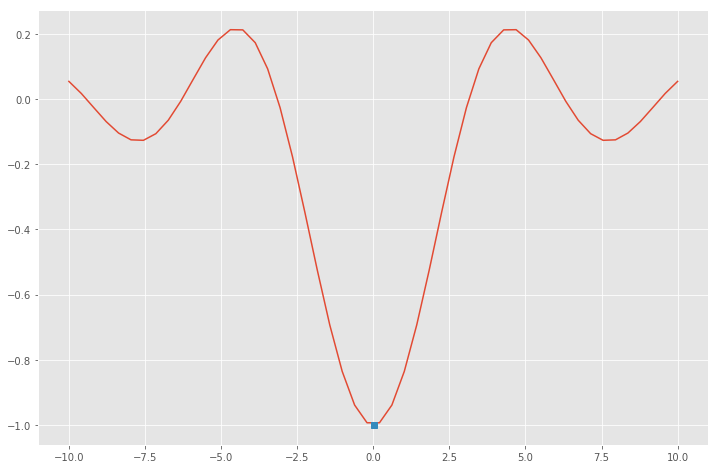

In [140]:
x = np.linspace(-10,10,50)
func = lambda x: -np.sin(x)/x
y = func(x)
plt.plot(x,y)

y_best = func(best['x'])
plt.plot(best['x'], y_best, marker='s')

Нашли)

Возвращаясь к нашим баранам, функция вданном случае будет возвращать метрику качества модели (пайплайна) на кроссвалидации. С помощью `hyperopt` мы будем искать минимум этой функции при заданных диаполознах значений гипер параметров.

Но самым важным плюсом, как по мне, является гибкость - в функцию, которую мы хотим минимизировать можно написать все что угодно. Например, сейчас я добавлю вариативность в пайплайне по типу шкалирования между - StandartScaler или RobustScaler.

In [141]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [142]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

In [143]:
X

array([[7.55622650e+07, 0.00000000e+00, 0.00000000e+00, ...,
        3.29113924e-01, 3.25949367e-01, 8.22784810e-02],
       [1.09285460e+07, 0.00000000e+00, 0.00000000e+00, ...,
        4.13554633e-01, 4.28769018e-02, 1.90871369e-01],
       [6.93484680e+07, 0.00000000e+00, 0.00000000e+00, ...,
        4.93150685e-01, 1.96347032e-01, 1.36986301e-02],
       ...,
       [1.07589840e+07, 0.00000000e+00, 0.00000000e+00, ...,
        5.14619883e-01, 3.62573099e-01, 0.00000000e+00],
       [1.13765560e+07, 0.00000000e+00, 0.00000000e+00, ...,
        5.13333333e-01, 1.46666667e-01, 4.66666667e-02],
       [2.91906490e+07, 0.00000000e+00, 0.00000000e+00, ...,
        3.15217391e-01, 1.08695652e-01, 1.73913043e-01]])

In [144]:
y

array([0, 1, 1, ..., 1, 0, 0])

In [145]:
def run_trials_template(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.items():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        
        # Итоговый пайплайн
        model = Pipeline([
            ('scaler', scaler),
            ('clf', clf)
        ])

        # Схема кросс-валидации
        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv, 
                                 n_jobs=-1)

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return trials

In [146]:
# Задаем пространство поиска
space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l1', 'l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED,
    'scaler_type': hp.choice('scaler_type', ['standart', 'robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True])
}

In [147]:
# Запускаем поиск
trials = run_trials_template(X, y, space4_lm, evals=40)

In [148]:
trials

In [149]:
def trials_df(trials):
    '''
    Функция форматирует результаты hyperopt в dataframe
    '''
    tr_dict = []
    for t in trials:
        trial = dict()
        for k, v in t['misc']['vals'].items():
            trial[k] = v[0]

        trial['qscore'] = -t['result']['qscore']
        trial['qscore_std'] = -t['result']['qscore_std']
        tr_dict.append(trial)

    df_res = pd.DataFrame.from_dict(tr_dict)
    df_res = df_res.sort_values('qscore', ascending=False)
    
    return df_res

Достаем результаты.

Стоит оговорится, что в некоторых столбцах указаны не фактические значение гиперпараметров, а их позиция в соответствуюем поле в `space4_lm`

In [150]:
df_trials = trials_df(trials)

In [151]:
df_trials

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
32,0.026690,1,0,0.836812,-0.003762,0,1
30,0.030127,1,0,0.836757,-0.003601,0,1
28,0.018962,1,0,0.836613,-0.004149,0,1
8,0.018043,1,0,0.836541,-0.004204,0,1
34,0.037602,1,0,0.836510,-0.003339,0,1
31,0.040155,1,0,0.836474,-0.003296,0,1
27,0.016668,1,0,0.836376,-0.004123,1,1
23,0.013645,1,0,0.835868,-0.004434,1,1
36,0.071391,1,0,0.835780,-0.002827,0,1
26,0.093458,1,0,0.835538,-0.002587,0,1


Здесь `qscore` - метрика качесва, а `scaler_type = 1` означает, что был выбран `scaler_type = robust`

In [152]:
df_trials.head()

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
32,0.026690,1,0,0.836812,-0.003762,0,1
30,0.030127,1,0,0.836757,-0.003601,0,1
28,0.018962,1,0,0.836613,-0.004149,0,1
8,0.018043,1,0,0.836541,-0.004204,0,1
34,0.037602,1,0,0.836510,-0.003339,0,1


## Ваш черед

### Новые признаки

Задание творческое - придумайте по новому признаку (группе признаков)
* На основе mcc (tr_type)
* На основе временного фактора
* На основе текстов из описания mcc

Реалиуйте их в функции, аналогичной `gen_features`.

In [153]:
df_tr.head()

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [154]:
df_mcc.tail()

,mcc_code,mcc_description
179,9211,"Судовые выплаты, включая алименты и детскую по..."
180,9222,Штрафы
181,9311,Налоговые платежи
182,9399,"Правительственные услуги, нигде ранее не класс..."
183,9402,Почтовые услуги — только правительство


In [155]:
df_transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15


In [156]:
df_transactions.nunique()

customer_id      15000
mcc_code           184
tr_type             77
amount           53859
term_id         440338
day                457
dt             5432555
weekday              7
datetime       5432555
date               457
hour                24
dtype: int64

In [157]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6849346 entries, 0 to 6849345
Data columns (total 11 columns):
customer_id    int64
mcc_code       int64
tr_type        int64
amount         float64
term_id        object
day            int64
dt             int64
weekday        int64
datetime       datetime64[ns]
date           object
hour           object
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 574.8+ MB


In [158]:
df_transactions[df_transactions['term_id'].isnull()]

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15
5,39026145,5541,1010,-652.0,NaN,2,1407081229,7,2014-08-03 15:53:49,2014-08-03,15
6,39026145,5499,1010,-45.0,NaN,3,1407166148,1,2014-08-04 15:29:08,2014-08-04,15
7,39026145,5200,1010,-126.0,NaN,4,1407240717,2,2014-08-05 12:11:57,2014-08-05,12
8,39026145,5499,1010,-28.0,NaN,5,1407338359,3,2014-08-06 15:19:19,2014-08-06,15
9,39026145,4814,1030,-250.0,NaN,6,1407395311,4,2014-08-07 07:08:31,2014-08-07,07


In [159]:
df_transactions[['tr_type']].groupby(by='tr_type').size()

tr_type
1000         43
1010    1589734
1030     970994
1100     117870
1110     928154
1200      90742
1210      20830
1310       1173
1410       1302
1510         20
2000          1
2010    1040713
2011      63127
2020      13035
2021        570
2100        124
2110       9457
2200         38
2210       4372
2320       4765
2330      69633
2331      20881
2340        183
2341         49
2370     376521
2371      65809
2440       3588
2446         77
2456        652
2460       1419
         ...   
4210       3221
4500        326
6000         52
6010       1947
6100       1829
6110      19822
6200       3855
6210        501
7010     258088
7011      11029
7014       2424
7015         58
7020      14529
7021       8663
7024         82
7025         33
7030     155200
7031      34676
7034        838
7035        199
7040        252
7041         89
7044          1
7070     691896
7071      96146
7074       2457
7075        438
8100        137
8145         12
8146         10
Length: 77, dtyp

In [160]:
df_transactions[['mcc_code']].groupby(by='mcc_code').size()

mcc_code
742        275
1711       113
1731        81
1799       116
2741        53
3000      3233
3351        60
3501       526
4111      2894
4112     13079
4121      4705
4131       300
4214       385
4215       572
4411       109
4511      5630
4722      2587
4784      1268
4789      2356
4812     13945
4814    987181
4816      7476
4829    624643
4899      1836
4900     12037
5013       453
5039       446
5044        84
5045       598
5047       101
         ...  
7832      7756
7841       412
7922      1575
7932        73
7933       301
7991       414
7993       848
7994     10203
7995     21742
7996       314
7997      2521
7999      1951
8011      1218
8021      2286
8043      2135
8062       416
8071       327
8099      8034
8220       118
8244        41
8299       328
8398       635
8641      1391
8699        67
8999     23871
9211        74
9222       481
9311       183
9399      1663
9402        67
Length: 184, dtype: int64

In [161]:
df_gender.head()

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1
4,61009479,0


In [162]:
df_mcc.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


In [163]:
df_gender.head()

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1
4,61009479,0


In [191]:
d = df_transactions.fillna(0)
d = df_transactions.pivot_table(index = 'mcc_code', columns = 'weekday', values = 'amount', aggfunc=np.sum, fill_value=0)
d = d.rename(lambda x: 'w_{}_sum'.format(x), axis=1).fillna(0)
d = df_mcc.join(d, on = 'mcc_code', how='left')
d

,mcc_code,mcc_description,w_1_sum,w_2_sum,w_3_sum,w_4_sum,w_5_sum,w_6_sum,w_7_sum
0,742,Ветеринарные услуги,-29459,-30226,-31999,-60115,-40257,-43609,-64541
1,1711,"Генеральные подрядчики по вентиляции, теплосна...",-72011,-156537,-82486,-91438,-55461,-75359,-14286
2,1731,Подрядчики по электричеству,-3993,-29910,-4145,-20472,-6583,-11089,-5050
3,1799,"Подрядчики, специализированная торговля — нигд...",-4591,-21476,-126859,-66193,-132145,-32804,-96105
4,2741,Разнообразные издательства/печатное дело,-8250,-10110,-7851,-10825,-9661,-6775,-8616
5,3000,"Авиалинии, авиакомпании",-7709474,-8047640,-6217056,-9219366,-7171612,-5174615,-4971710
6,3351,Агентства по аренде автомобилей,-163559,-95897,-173297,-83648,-115332,-172823,-41740
7,3501,"Жилье — отели, мотели, курорты",-741291,-751792,-579793,-510198,-805682,-1045497,-1045364
8,4111,Транспортировка — пригородные и локальные сезо...,-254199,-275682,-295180,-268699,-225935,-194913,-244923
9,4112,Пассажирские железные перевозки,-3573101,-4272184,-4384764,-3964846,-3784848,-3085506,-3136996


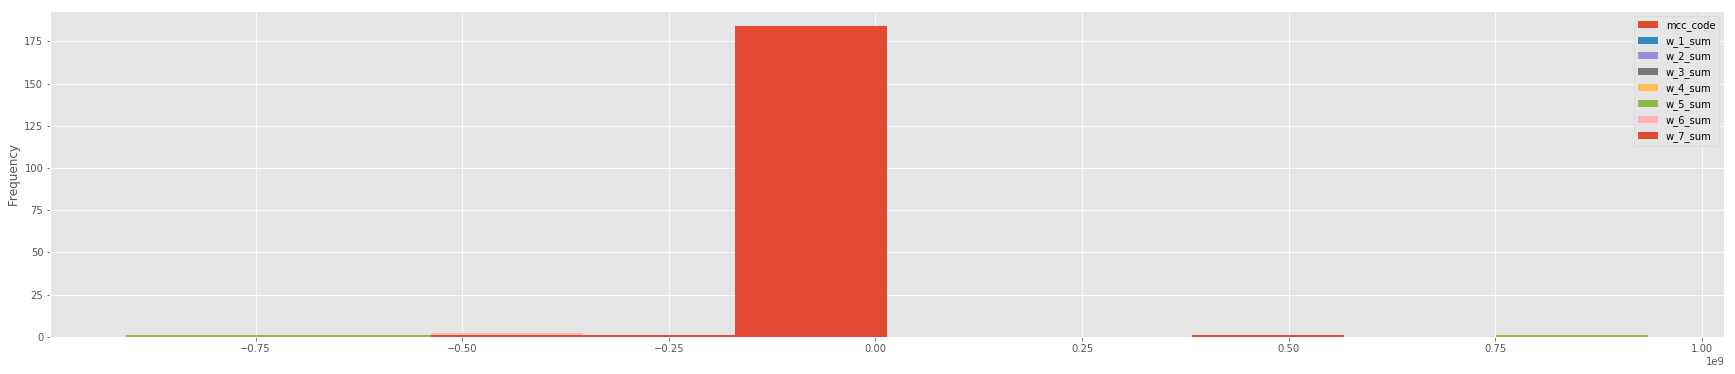

In [165]:
_, ax = plt.subplots(figsize=(30, 6))
d.plot(kind = 'hist', ax=ax)

In [166]:
df_gender.columns

Index(['customer_id', 'gender'], dtype='object')

In [167]:
df_transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15


In [192]:
def gen_features(df_gender, df_transactions, df_mcc):
    df_new_tr_type = df_transactions.fillna(0)
    df_new_tr_type = df_transactions.pivot_table(index=['customer_id'], columns='tr_type', values='amount', 
                                 aggfunc=np.size, fill_value=0)
    df_new_tr_type = df_new_tr_type.rename(lambda x: 'tr_type_{}_count'.format(x), axis=1)
    df_new_tr_type = df_new_tr_type.fillna(0)
    # df_new_tr_type = df_gender.join(df_new_tr_type.fillna(0), on='customer_id', how='left')
    # df_new_tr_type

    df_new_weekday = df_transactions.fillna(0)
    df_new_weekday = df_transactions.pivot_table(index=['customer_id'], columns='weekday', values='amount', 
                                 aggfunc=np.size, fill_value=0)
    df_new_weekday = df_new_weekday.rename(lambda x: 'w_{}_sum'.format(x), axis=1)
    df_new_weekday = df_new_weekday.fillna(0)
    # df_new_weekday = df_gender.join(df_new_weekday.fillna(0), on='customer_id', how='left')
    # df_new_weekday

    # df_new_avg_amount_per_day = df_transactions.fillna(0)
    # df_new_avg_amount_per_day = df_transactions.pivot_table(index=['customer_id'], columns='date', values='amount', 
    #                              aggfunc=np.mean, fill_value=0)
    # df_new_avg_amount_per_day = df_new_avg_amount_per_day.rename(lambda x: 'd_{}_mean'.format(x), axis=1)
    # df_new_avg_amount_per_day = df_new_avg_amount_per_day.fillna(0)
    # # df_new_avg_amount_per_day = df_gender.join(df_new_avg_amount_per_day.fillna(0), on='customer_id', how='left')
    # # df_new_avg_amount_per_day

    # не работает
    df_week_rations = df_transactions.pivot_table(index=['customer_id'], columns = 'weekday', values='amount', aggfunc=np.size, fill_value=0)
    df_week_rations = df_week_rations.iloc[:,:-2]
    total = df_week_rations.sum(axis=1)
    #     df_week_rations
    df_week_rations_sum = df_transactions.pivot_table(index=['customer_id'], columns = 'weekday', values='amount', aggfunc='sum', fill_value=0)
    df_week_rations_sum.loc[:, 'workingday'] = (df_week_rations_sum.iloc[:,1:5].sum(axis=1).T/total)
    df_week_rations_sum = df_week_rations_sum[['workingday']]
    df_week_rations_sum = df_week_rations_sum.fillna(0)
    #     df_week_rations_sum

    df_transactions_mcc = df_transactions.join(df_mcc.set_index('mcc_code'), on='mcc_code')

    df_transactions_mcc_pivot = df_transactions_mcc.loc[:, ['customer_id', 'mcc_description']]\
                                   .pivot_table(index=['customer_id'], 
                                    values=['mcc_description'], 
                                    aggfunc=lambda x: ' '.join(x), fill_value='')
    df_transactions_mcc_pivot = df_transactions_mcc_pivot.fillna('')
    # df_transactions_mcc_pivot

    df_features = df_gender.join(df_new_tr_type, on='customer_id', how='left')\
                               .join(df_new_weekday, on='customer_id', how='left')\
                               .join(df_new_avg_amount_per_day, on='customer_id', how='left')\
                               .join(df_week_rations_sum, on='customer_id', how='left')\
                               .join(df_transactions_mcc_pivot, on='customer_id', how='left')
    return df_features

df_features = df_gender.pipe(gen_features, df_transactions, df_mcc)
df_features = df_features.fillna('')

In [193]:
label = 'gender'
idx_features = df_features.columns != label

In [194]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

In [195]:
X

array([[75562265, 0, 3, ..., 0.0, 78.70661157024793,
        'Финансовые институты — снятие наличности автоматически Финансовые институты — снятие наличности вручную Звонки с использованием телефонов, считывающих магнитную ленту Звонки с использованием телефонов, считывающих магнитную ленту Финансовые институты — снятие наличности автоматически Звонки с использованием телефонов, считывающих магнитную ленту Финансовые институты — снятие наличности автоматически Финансовые институты — снятие наличности автоматически Финансовые институты — снятие наличности вручную Финансовые институты — снятие наличности вручную Звонки с использованием телефонов, считывающих магнитную ленту Финансовые институты — снятие наличности автоматически Звонки с использованием телефонов, считывающих магнитную ленту Звонки с использованием телефонов, считывающих магнитную ленту Звонки с использованием телефонов, считывающих магнитную ленту Звонки с использованием телефонов, считывающих магнитную ленту Финансовые и

## Поиск гиперпараметров

Реализуйте функцию для hyperopt по перебору гипер параметров вашего пайплайна

На всякий случай почитайте еще про [`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html) и [пример](http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html#sphx-glr-auto-examples-hetero-feature-union-py)

In [196]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, rand
from sklearn.feature_extraction.text import TfidfVectorizer

RND_SEED = 42

In [197]:
# А это трансформер, который выбирает подможнество столбцов из матрицы X
# Который нужен для того, чтобы делать какие-то действия только для подмноества столбцов, а потом объединять результаты
# Через FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, col_idx):
        self.col_idx = col_idx
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[:, self.col_idx]

In [198]:
def run_trials_template(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.items():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        text_feature_col = X_.shape[1]-1
        other_features = range(0, X_.shape[1]-1)
        
        # Итоговый пайплайн
        model = Pipeline([
            ('features', FeatureUnion([
                ('text_features', Pipeline([
                    ('vect', ColumnSelector(col_idx=text_feature_col)),
                    ('vectorizer', TfidfVectorizer(
                                    max_df=0.95, min_df=5,
                                    ngram_range = (1,1)))
                ])),
                ('other_features', Pipeline([
                    ('other_select', ColumnSelector(col_idx=other_features)),
                    ('scaler', scaler)
                ]))
            ])),
            ('clf', clf)
        ])

        # Схема кросс-валидации
        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv, 
                                 n_jobs=-1)

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return trials

In [199]:
#Задаем пространство поиска
space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l1', 'l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED,
    'scaler_type': hp.choice('scaler_type', ['standart', 'robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True])
}

In [200]:
# Запускаем поиск
trials = run_trials_template(X, y, space4_lm, evals=5)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by 

In [203]:
def trials_df(trials):
    '''
    Функция форматирует результаты hyperopt в dataframe
    '''
    tr_dict = []
    for t in trials:
        trial = dict()
        for k, v in t['misc']['vals'].items():
            trial[k] = v[0]

        trial['qscore'] = -t['result']['qscore']
        trial['qscore_std'] = -t['result']['qscore_std']
        tr_dict.append(trial)

    df_res = pd.DataFrame.from_dict(tr_dict)
    df_res = df_res.sort_values('qscore', ascending=False)
    
    return df_res

In [204]:
df_trials = trials_df(trials)

In [205]:
df_trials.head()

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
0,4.094665,0,0,0.819411,-0.010389,0,1
1,1.949010,1,1,0.801266,-0.011113,1,0
4,0.029846,1,0,0.705304,-0.012044,0,0
3,13.960968,0,1,0.569288,-0.032976,1,1
2,0.262289,1,1,0.566546,-0.033862,0,1
